# **Classify Balinese Script Handwriting with Canvas**

The user can create a Balinese Script with handwriting on the canvas, then the top 3 prediction of the script image will appear when clicking the classify button.

# Mount Google Drive to access datasets

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Install required libraries for canvas and widgets

In [2]:
!pip install ipycanvas
!pip install ipywidgets

# Import libraries

In [3]:
import tensorflow as tf
import numpy as np
import os
from tensorflow import keras
from tensorflow.keras import layers, models
import gzip
import matplotlib.pyplot as plt
from google.colab import output
from ipycanvas import Canvas
from PIL import Image
import ipywidgets as widgets

# Load Data

In [4]:
# Function to load images from a gzip file
def load_mnist_images(file_path):
    with gzip.open(file_path, 'rb') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        num_images = int.from_bytes(f.read(4), 'big')
        rows = int.from_bytes(f.read(4), 'big')
        cols = int.from_bytes(f.read(4), 'big')
        # Read image data and reshape into a numpy array
        buffer = f.read()
        data = np.frombuffer(buffer, dtype=np.uint8)
        data = data.reshape(num_images, rows, cols, 1)
        return data / 255.0

# Function to load labels from a gzip file
def load_mnist_labels(file_path):
    with gzip.open(file_path, 'rb') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        num_labels = int.from_bytes(f.read(4), 'big')
        buffer = f.read()
        labels = np.frombuffer(buffer, dtype=np.uint8)
        return labels

# Paths to the training and testing dataset directories
train_dir = "/content/drive/My Drive/aksaraZIP_280/train"
test_dir = "/content/drive/My Drive/aksaraZIP_280/test"

# Load training and testing data
train_images = load_mnist_images(f"{train_dir}/train-images-idx3-ubyte.gz")
train_labels = load_mnist_labels(f"{train_dir}/train-labels-idx1-ubyte.gz")
test_images = load_mnist_images(f"{test_dir}/t10k-images-idx3-ubyte.gz")
test_labels = load_mnist_labels(f"{test_dir}/t10k-labels-idx1-ubyte.gz")

# Verify the shape of the datasets
print("Train Images Shape:", train_images.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)

Train Images Shape: (720, 280, 280, 1)
Train Labels Shape: (720,)
Test Images Shape: (180, 280, 280, 1)
Test Labels Shape: (180,)


# Create Model

In [5]:
# Create a Convolutional Neural Network model
def create_model():
    model = models.Sequential([
        layers.Conv2D(8, (3, 3), activation='relu', input_shape=(280, 280, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(16, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(18, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [6]:
# Create and summarize the model
model = create_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 278, 278, 8)         │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 139, 139, 8)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 137, 137, 16)        │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 68, 68, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 73984)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       9,470,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 18)                  │           2,322 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,473,650 (36.14 MB)

 Trainable params: 9,473,650 (36.14 MB)

 Non-trainable params: 0 (0.00 B)

# Train Model

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 51s 2s/step - accuracy: 0.4294 - loss: 2.0079 - val_accuracy: 0.7667 - val_loss: 0.7684
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.9241 - loss: 0.2536 - val_accuracy: 0.8667 - val_loss: 0.4920
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9902 - loss: 0.0373 - val_accuracy: 0.8778 - val_loss: 0.4595
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9981 - loss: 0.0075 - val_accuracy: 0.8778 - val_loss: 0.4611
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9981 - loss: 0.0092 - val_accuracy: 0.8833 - val_loss: 0.5509
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.8889 - val_loss: 0.4930
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 1.0000 - loss: 8.3041e-04 - val_accuracy: 0.8889 - val_loss: 0.4675
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 1.0000 - loss: 2.9254e-04 - val_accuracy: 0.8889 - v

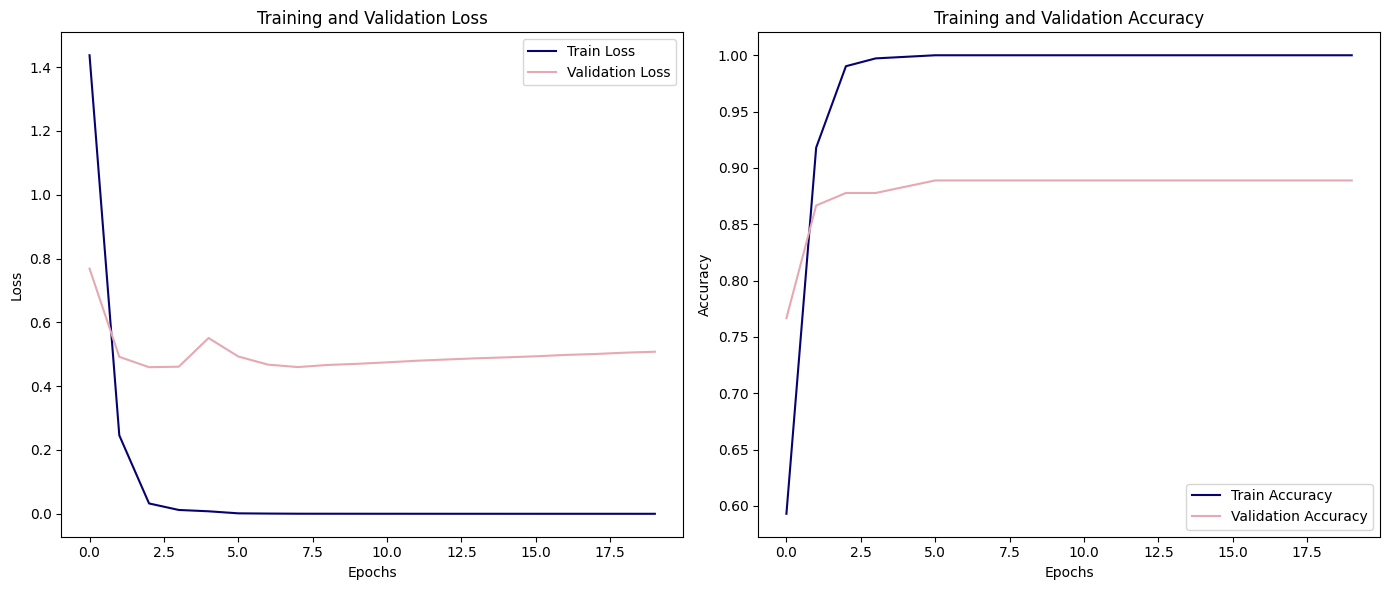

In [7]:
# Train the model and plot the graphs
def train_model(model, train_images, train_labels, test_images, test_labels):
    # Train the model with the specified number of epochs
    history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))
    # Plot training and validation accuracy and loss
    plot_training_graphs(history)
    return history

# Function to display two separate graphs: accuracy and loss
def plot_training_graphs(history):
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot Training and Validation Loss
    axes[0].plot(history.history['loss'], label='Train Loss', color='#060270')
    axes[0].plot(history.history['val_loss'], label='Validation Loss', color='#E6A8B2')
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    # Plot Training and Validation Accuracy
    axes[1].plot(history.history['accuracy'], label='Train Accuracy', color='#060270')
    axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy', color='#E6A8B2')
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()
    # Show the plots
    plt.show()

# Create and train the model
model = create_model()
history = train_model(model, train_images, train_labels, test_images, test_labels)


# Create and Classify Handwriting

In [20]:
# Enable the custom widget manager for interactive tools
output.enable_custom_widget_manager()

# Declare canvas as a global variable
global canvas
canvas = None

# Function to create a canvas for drawing
def create_canvas():
    global canvas
    canvas = Canvas(width=280, height=280, sync_image_data=True)
    canvas.fill_style = 'black'
    canvas.fill_rect(0, 0, 280, 280)
    canvas.stroke_style = 'white'
    canvas.line_width = 10
    drawing = False

    # Define event handlers for mouse interactions
    def handle_mouse_down(x, y):
        nonlocal drawing
        drawing = True
        canvas.begin_path()
        canvas.move_to(x, y)

    def handle_mouse_move(x, y):
        if drawing:
            canvas.line_to(x, y)
            canvas.stroke()

    def handle_mouse_up(x, y):
        nonlocal drawing
        drawing = False

    # Attach event handlers to the canvas
    canvas.on_mouse_down(handle_mouse_down)
    canvas.on_mouse_move(handle_mouse_move)
    canvas.on_mouse_up(handle_mouse_up)

    return canvas


# Function to process canvas image for prediction
def process_canvas_for_prediction(canvas):
    img_data = canvas.get_image_data(0, 0, canvas.width, canvas.height)
    img = np.array(img_data.data, dtype=np.uint8).reshape((canvas.height, canvas.width, 4))[:, :, 0]
    img = Image.fromarray(img)
    img = img.convert('L')
    img = img.resize((280, 280))
    img = np.array(img) / 255.0
    return img.reshape(1, 280, 280, 1)

# Dictionary mapping class indices to labels
label_map = {
    0: 'A', 1: 'BA', 2: 'CA', 3: 'DA', 4: 'GA', 5: 'JA', 6: 'KA', 7: 'LA', 8: 'MA', 9: 'NA',
    10: 'NGA', 11: 'NYA', 12: 'PA', 13: 'RA', 14: 'SA', 15: 'TA', 16: 'WA', 17: 'YA'
}

# Function to classify a drawing and display the top 3 predictions
def classify_drawing_with_top3(model, canvas):
    img_array = process_canvas_for_prediction(canvas)
    prediction = model.predict(img_array)[0]  # Get prediction as a 1D array
    top3_indices = np.argsort(prediction)[-3:][::-1]  # Get indices of top 3 predictions
    top3_values = prediction[top3_indices]  # Get probabilities of top 3 predictions

    # Print top 3 predictions
    print("Top 3 Predictions:")
    for i in range(3):
        label = label_map[top3_indices[i]]  # Map index to label
        print(f"{i+1}. {label}: {top3_values[i] * 100:.2f}%")

    return top3_indices, top3_values

# Function to run classification workflow
def run_classification(model):
    global canvas
    canvas = create_canvas()
    display(canvas)


# Button to classify
button = widgets.Button(description="Classify Drawing")
display(button)

def on_button_click(b):
    classify_drawing_with_top3(model, canvas)  # Predict and display top 3 results

button.on_click(on_button_click)


# Button to clear the canvas
clear_button = widgets.Button(description="Clear Canvas")
display(clear_button)

def on_clear_click(b):
    canvas.clear()  # Clear the canvas for a new drawing
    canvas.fill_style = 'black'
    canvas.fill_rect(0, 0, 280, 280)

clear_button.on_click(on_clear_click)


# Run the main function to allow user input through the canvas
run_classification(model)

Button(description='Classify Drawing', style=ButtonStyle())

Button(description='Clear Canvas', style=ButtonStyle())

Canvas(height=280, sync_image_data=True, width=280)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Top 3 Predictions:
1. SA: 99.99%
2. DA: 0.01%
3. KA: 0.00%


**Conclusion :**
The model can predict accurately.

# Model conversion to TensorFlow.js format

In [13]:
# Install TensorFlow.js library to enable model conversion to TensorFlow.js format
!pip install tensorflowjs

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 60.7 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully unin

In [16]:
# Save the model in the current directory
model.export('HandwritingAksara') # Exports the trained model to a folder named 'HandwritingAksara'

Saved artifact at 'HandwritingAksara'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 280, 280, 1), dtype=tf.float32, name='keras_tensor_8')
Output Type:
  TensorSpec(shape=(None, 18), dtype=tf.float32, name=None)
Captures:
  139278932357920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139278932544320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139278976306160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139278932547312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139278932356160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139278932549952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139278932549776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139278932547840: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [17]:
# Convert the saved TensorFlow model to TensorFlow.js format
!tensorflowjs_converter --input_format=tf_saved_model --skip_op_check HandwritingAksara HandwritingAksara_tfjs

# Explanation:
# --input_format=tf_saved_model: Specifies that the model format is TensorFlow SavedModel.
# --skip_op_check: Skips operation compatibility check (useful if unsupported operations exist).
# HandwritingAksara: Source folder containing the saved TensorFlow model.
# HandwritingAksara_tfjs: Target folder where the converted TensorFlow.js model will be saved.

2024-12-11 13:23:52.862713: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733923432.890989   10175 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733923432.899003   10175 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2024-12-11 13:23:57.062227: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
I0000 00:00:1733923437.342198   10175 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
I0000 00:00

In [19]:
# Import the required libraries for file handling and downloading
from google.colab import files
import shutil

# Create a zip archive of the converted TensorFlow.js model folder
shutil.make_archive('HandwritingAksara_tfjs', 'zip', 'HandwritingAksara_tfjs')
# 'HandwritingAksara_tfjs': The folder to be compressed into a zip file.
# 'zip': Specifies the archive format.

# Download the zipped TensorFlow.js model folder
files.download('HandwritingAksara_tfjs.zip')
# The zip file will be downloaded to the local system, allowing it to be deployed for web use.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>